In [ ]:
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.parse import urljoin
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.ncaa.com/stats/basketball-women/d1'
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')
similar_websites_elements = soup.find_all(class_= "block-stats__header__link stats-pager-link")
# similar_websites_data = similar_websites_element.text
print("Similar Websites:", similar_websites_elements)

Similar Websites: [<a class="block-stats__header__link stats-pager-link" href="/stats/basketball-women/d1/current/individual/102">Points Per Game</a>, <a class="block-stats__header__link stats-pager-link" href="/stats/basketball-women/d1/current/individual/103">Rebounds Per Game</a>, <a class="block-stats__header__link stats-pager-link" href="/stats/basketball-women/d1/current/team/111">Scoring Offense</a>, <a class="block-stats__header__link stats-pager-link" href="/stats/basketball-women/d1/current/team/112">Scoring Defense</a>]


In [ ]:
for element in similar_websites_elements:
  relative_url = element['href']
  complete_url = urljoin(url, relative_url)
  print("Complete URL:", complete_url)

Complete URL: https://www.ncaa.com/stats/basketball-women/d1/current/individual/102
Complete URL: https://www.ncaa.com/stats/basketball-women/d1/current/individual/103
Complete URL: https://www.ncaa.com/stats/basketball-women/d1/current/team/111
Complete URL: https://www.ncaa.com/stats/basketball-women/d1/current/team/112


In [ ]:
completed_urls = []
for element in similar_websites_elements:
  relative_url = element['href']
  complete_url = urljoin(url, relative_url)
  completed_urls.append(complete_url)
print(completed_urls)

['https://www.ncaa.com/stats/basketball-women/d1/current/individual/102', 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/103', 'https://www.ncaa.com/stats/basketball-women/d1/current/team/111', 'https://www.ncaa.com/stats/basketball-women/d1/current/team/112']


In [ ]:
interesting_url = completed_urls[0:2]
print(interesting_url)

['https://www.ncaa.com/stats/basketball-women/d1/current/individual/102', 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/103']


In [ ]:
tables = []
for url in interesting_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  table = soup.find('table')
  tables.append(table)
print(tables)

In [ ]:
dfs = []
for table in tables:
  df = pd.read_html(str(table))[0]
  dfs.append(df)

table1_df = dfs[0]
print("Table 1:")
print(table1_df)
table2_df = dfs[1]
print("\nTable 2:")
print(table2_df)

In [ ]:
new_table1_df = dfs[0].iloc[:, [0, 4,10,11]]
print("Points per game: ")
print(new_table1_df)

Points per game: 
   Rank Height   PTS   PPG
0     1    6-0  1234  31.6
1     2    6-2   920  27.1
2     3    5-9   815  23.3
3     4    5-8   759  23.0
4     5    6-6   661  22.8
5     6    5-6   790  22.6
6     7    5-7   670  22.3
7     8    5-5   712  22.2
8     9    5-7   577  22.2
9    10    5-2   684  22.1
10   11   5-11   637  22.0
11   12    6-0   854  21.9
12   13    6-2   727  21.4
13   14    5-8   705  21.4
14   15    5-9   568  21.0
15   16    6-1   734  21.0
16   17    6-0   684  20.7
17   18    5-8   662  20.7
18   19    5-8   599  20.7
19   20    5-7   632  20.4
20   21   5-11   611  20.4
21   22    5-6   667  20.2
22   23    6-2   505  20.2
23   24    6-3   633  19.8
24   25    5-8   652  19.8
25   26    6-6   533  19.7
26   27    6-1   670  19.7
27   28    6-1   625  19.5
28   29   5-10   663  19.5
29   30    5-8   643  19.5
30   31   5-11   583  19.4
31   32    6-3   698  19.4
32   33   5-10   445  19.3
33   34    5-7   637  19.3
34   35    5-8   675  19.3
35   36   

In [ ]:
new_table2_df = dfs[1].iloc[:, [0,4, 7, 8, 9, 10]]
print("Rebounds per game: ")
print(new_table2_df)

Rebounds per game: 
   Rank Height  ORebs  DRebs  REB   RPG
0     1    6-1    171    333  504  15.3
1     2    6-3    183    258  441  13.4
2     3    6-8    136    245  381  11.9
3     4    6-2    141    251  392  11.9
4     5    6-4     97    306  403  11.9
5     6    6-6     97    233  330  11.4
6     7    6-2     54    283  337  11.2
7     8    6-1    150    196  346  11.2
8     9    6-3    140    257  397  11.0
9    10    6-2     73    299  372  10.9
10   11    6-2    152    185  337  10.9
11   12   5-10     97    269  366  10.8
12   13    6-1     72    259  331  10.7
13   14    6-4     92    228  320  10.7
14   15    6-4     81    249  330  10.6
15   16   5-11    138    180  318  10.6
16    -   5-10    145    173  318  10.6
17   18    6-3    124    215  339  10.6
18   19    6-2     88    240  328  10.6
19   20    6-0    118    199  317  10.6
20   21    6-2    122    163  285  10.6
21   22    6-3    110    259  369  10.5
22   23    6-4     89    246  335  10.5
23   24    6-1    13

In [ ]:
print("Top 10 players stats")
top_10_df = new_table1_df.iloc[:10]
print(top_10_df)

Top 10 players stats
  Rank Height   PTS   PPG
0    1    6-0  1234  31.6
1    2    6-2   920  27.1
2    3    5-9   815  23.3
3    4    5-8   759  23.0
4    5    6-6   661  22.8
5    6    5-6   790  22.6
6    7    5-7   670  22.3
7    8    5-5   712  22.2
8    9    5-7   577  22.2
9   10    5-2   684  22.1


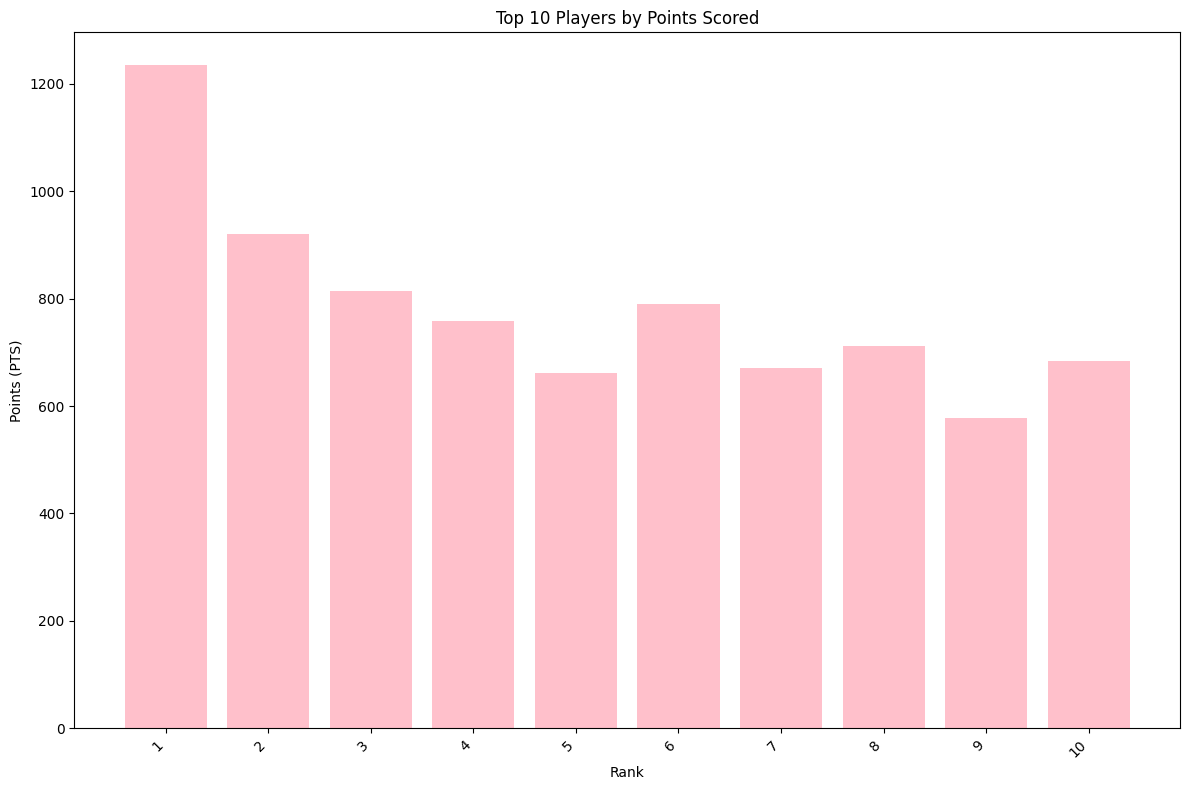

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(top_10_df['Rank'], top_10_df['PTS'], color='pink')
plt.title('Top 10 Players by Points Scored')
plt.xlabel('Rank')
plt.ylabel('Points (PTS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
frequent_height = new_table1_df['Height'].mode().iloc[0]
print("Most Frequent Height:", frequent_height)

Most Frequent Height: 5-8


In [ ]:
height_pattern = re.compile(r'(\d+)-(\d+)$')
def height_5_8(height):
  match = height_pattern.match(height)
  if match:
    feet = int(match.group(1))
    inches = int(match.group(2))
    return feet == 5 and inches == 8
  return False

height_5_8_df = new_table1_df[new_table1_df['Height'].apply(height_5_8)]
print(height_5_8_df)

   Rank Height  PTS   PPG
3     4    5-8  759  23.0
13   14    5-8  705  21.4
17   18    5-8  662  20.7
18   19    5-8  599  20.7
24   25    5-8  652  19.8
29   30    5-8  643  19.5
34   35    5-8  675  19.3
39   40    5-8  625  18.9
46    -    5-8  552  18.4


In [ ]:
missing_rank_index = height_5_8_df[height_5_8_df['Rank'] == '-'].index

# Check if there is any missing value and update if exists
if not missing_rank_index.empty:
    height_5_8_df.at[missing_rank_index[0], 'Rank'] = 47

# Print the updated DataFrame
print(height_5_8_df)

   Rank Height  PTS   PPG
3     4    5-8  759  23.0
13   14    5-8  705  21.4
17   18    5-8  662  20.7
18   19    5-8  599  20.7
24   25    5-8  652  19.8
29   30    5-8  643  19.5
34   35    5-8  675  19.3
39   40    5-8  625  18.9
46   47    5-8  552  18.4


In [ ]:
height_6_or_taller_df = new_table1_df[new_table1_df['Height'].apply(lambda x: int(x.split('-')[0]))>=6]
num_players_6_or_taller = len(height_6_or_taller_df)
print("Number of Players with Height 6'0 or taller:", num_players_6_or_taller)

Number of Players with Height 6'0 or taller: 17


In [ ]:
print(height_6_or_taller_df)

   Rank Height   PTS   PPG
0     1    6-0  1234  31.6
1     2    6-2   920  27.1
4     5    6-6   661  22.8
11   12    6-0   854  21.9
12   13    6-2   727  21.4
15   16    6-1   734  21.0
16   17    6-0   684  20.7
22   23    6-2   505  20.2
23   24    6-3   633  19.8
25   26    6-6   533  19.7
26   27    6-1   670  19.7
27   28    6-1   625  19.5
31   32    6-3   698  19.4
35   36    6-3   635  19.2
42   43    6-0   598  18.7
43   44    6-4   579  18.7
44   45    6-3   614  18.6


In [ ]:
height_avg_ppg = new_table1_df.groupby('Height')['PPG'].mean().reset_index(name='Average PPG')
height_avg_ppg['Average PPG'] = height_avg_ppg['Average PPG'].round(2)
print("Average PPG by Height:")
print(height_avg_ppg)

Average PPG by Height:
   Height  Average PPG
0    5-10        19.40
1    5-11        20.00
2     5-2        22.10
3     5-3        18.70
4     5-5        22.20
5     5-6        20.53
6     5-7        19.99
7     5-8        20.19
8     5-9        20.25
9     6-0        23.22
10    6-1        20.07
11    6-2        22.90
12    6-3        19.25
13    6-4        18.70
14    6-6        21.25


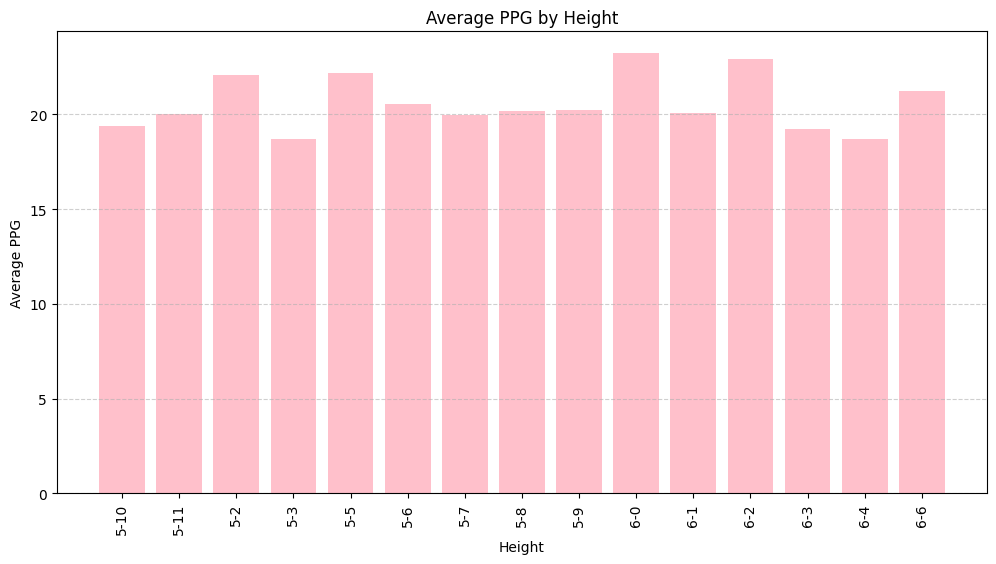

In [ ]:
plt.figure(figsize= (12,6))
plt.bar(height_avg_ppg['Height'],height_avg_ppg['Average PPG'], color = 'pink')
plt.xlabel('Height')
plt.ylabel('Average PPG')
plt.title('Average PPG by Height')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--',alpha=0.6)
plt.show()

In [ ]:
names_to_search = ["Angel Reese", "Caitlin Clark"]

for name in names_to_search:
  pattern = re.compile(fr".*{re.escape(name)}.*", flags=re.IGNORECASE)
  matching_row = table1_df[table1_df["Name"].apply(lambda x:bool (pattern.search(x)))]
  if not matching_row.empty:
    print(f"{name}: {matching_row['Rank'].iloc[0]}")
  else:
    print(f"{name} not in top 50")

Angel Reese: 45
Caitlin Clark: 1


In [ ]:
print("Top 10 players stats:")
print(new_table2_df.iloc[:10])

Top 10 players stats:
  Rank Height  ORebs  DRebs  REB   RPG
0    1    6-1    171    333  504  15.3
1    2    6-3    183    258  441  13.4
2    3    6-8    136    245  381  11.9
3    4    6-2    141    251  392  11.9
4    5    6-4     97    306  403  11.9
5    6    6-6     97    233  330  11.4
6    7    6-2     54    283  337  11.2
7    8    6-1    150    196  346  11.2
8    9    6-3    140    257  397  11.0
9   10    6-2     73    299  372  10.9


In [ ]:
frequent_height = new_table2_df['Height'].mode().iloc[0]
print("Most Frequent Height:", frequent_height)

Most Frequent Height: 6-2


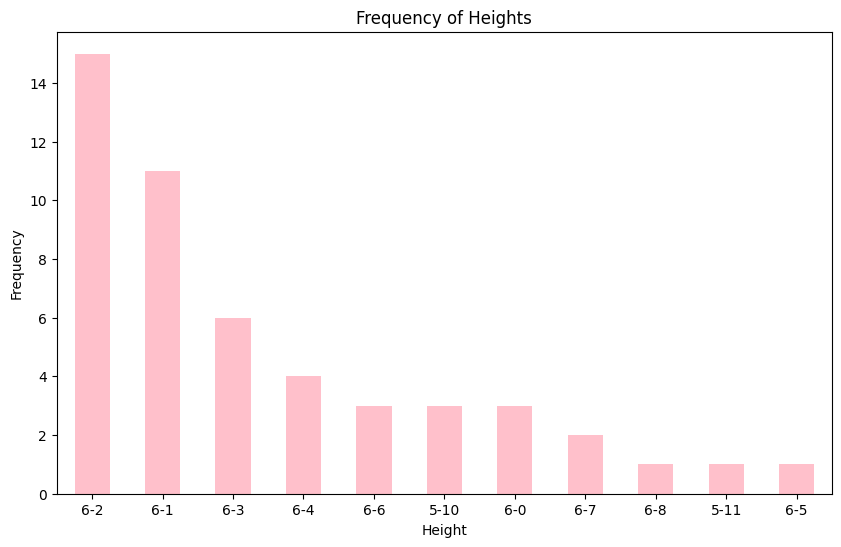

In [ ]:
height_counts = new_table2_df['Height'].value_counts()

plt.figure(figsize=(10, 6))
height_counts.plot(kind='bar', color='pink')
plt.title('Frequency of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
height_6_2_df = new_table2_df[new_table2_df['Height'] =='6-2']
print(height_6_2_df)

   Rank Height  ORebs  DRebs  REB   RPG
3     4    6-2    141    251  392  11.9
6     7    6-2     54    283  337  11.2
9    10    6-2     73    299  372  10.9
10   11    6-2    152    185  337  10.9
18   19    6-2     88    240  328  10.6
20   21    6-2    122    163  285  10.6
24   25    6-2     89    253  342  10.4
26   27    6-2     98    220  318  10.3
29   30    6-2    118    223  341  10.0
32   33    6-2    114    195  309  10.0
34   35    6-2    124    183  307   9.9
37   38    6-2     60    244  304   9.8
45   46    6-2    163    166  329   9.4
46   47    6-2     49    242  291   9.4
48   49    6-2     89    226  315   9.3


In [ ]:
average_rpg = new_table2_df['RPG'].mean()
num_players_above_avg = len(new_table2_df[new_table2_df['RPG']>= average_rpg])
print("Average RPG:", average_rpg)
print("Number of Players with RPG above average:", num_players_above_avg)

Average RPG: 10.47
Number of Players with RPG above average: 23


In [ ]:
names_to_search = ["Angel Reese", "Caitlin Clark"]

for name in names_to_search:
  pattern = re.compile(fr".*{re.escape(name)}.*", flags=re.IGNORECASE)
  matching_row = table2_df[table2_df["Name"].apply(lambda x:bool (pattern.search(x)))]
  if not matching_row.empty:
    print(f"{name}: {matching_row['Rank'].iloc[0]}")
  else:
    print(f"{name} not in top 50")

Angel Reese: 2
Caitlin Clark not in top 50
